**Code Part One**

In [2]:
!pip install patchify


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

In [5]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [6]:
minmaxscaler = MinMaxScaler()

In [7]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset'

total 33K
-rw------- 1 root root  548 Jul 29 18:48  classes.json
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 1'
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 2'
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 3'
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 4'
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 5'
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 6'
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 7'
drwx------ 2 root root 4.0K Jul 29 19:08 'Tile 8'


In [8]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/satellite/'

In [9]:
dataset_name = 'DubaiDataset'

In [10]:
for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print (dir_name)
  if dir_name == 'images': #mask
    images = os.listdir(path)
    print (path)
    #print (images)
    for i, image_names in enumerate(images): #.jpg(image) and .png(mask)
          #print (image_names)
          a = True

/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 3/images
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 8/images
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 2/images
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 6/images
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 5/images
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 7/images
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 4/images
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 1/images


In [11]:
image_patch_size = 256

In [12]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)


In [13]:
print(type(image))

<class 'numpy.ndarray'>


In [14]:
type (Image.fromarray(image))

PIL.Image.Image

In [15]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [16]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [17]:
len(image_patches)

2

In [18]:
image.shape

(544, 509, 3)

In [19]:
minmaxscaler = MinMaxScaler()

In [20]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [21]:
image_y.shape

(1, 256, 256, 3)

In [22]:
(image.shape [1]//image_patch_size)*image_patch_size

256

In [39]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [40]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [41]:
image_dataset = np.array(image_dataset)
image_dataset = np.array(mask_dataset)

In [42]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [44]:
type(image_dataset[0])

numpy.ndarray

In [45]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

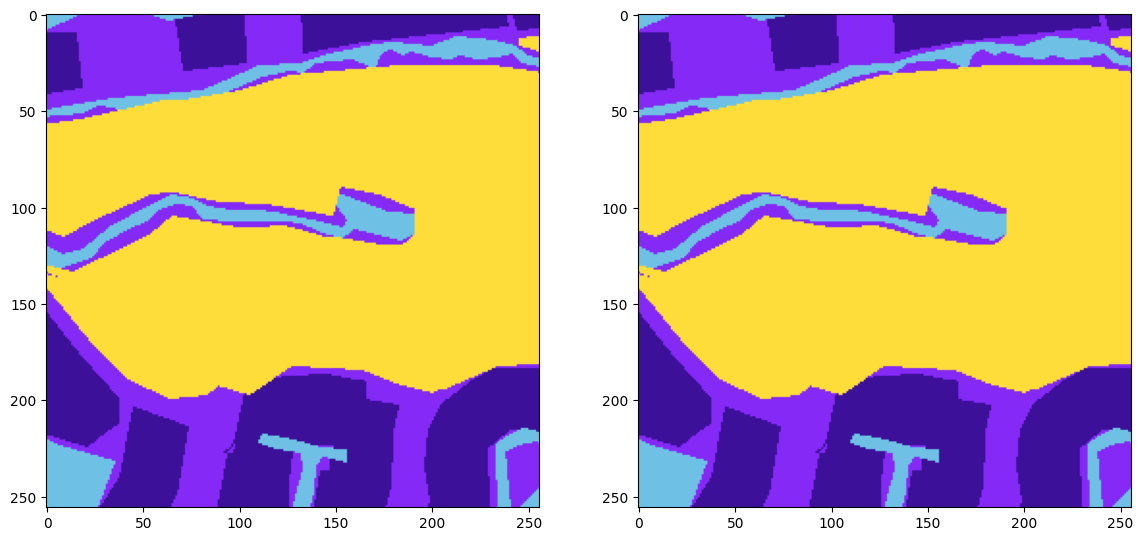

In [48]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [49]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [51]:
image_dataset.shape

(945, 256, 256, 3)

In [52]:
label = individual_patched_image

In [53]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [54]:
labels = []
for i in range(image_dataset.shape[0]):
  label = rgb_to_label(image_dataset[i])
  labels.append(label)

In [55]:
print(len(labels))

945


In [56]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
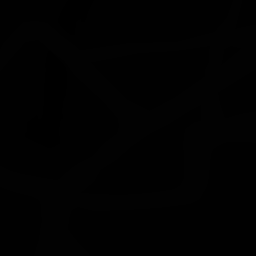

In [57]:
labels[3]

In [58]:
labels = np.expand_dims(labels, axis=3)

In [59]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [60]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [61]:
print("Total unique labels based on image:",format(np.unique(labels)))

Total unique labels based on image: [0 1 2 3 4 5]


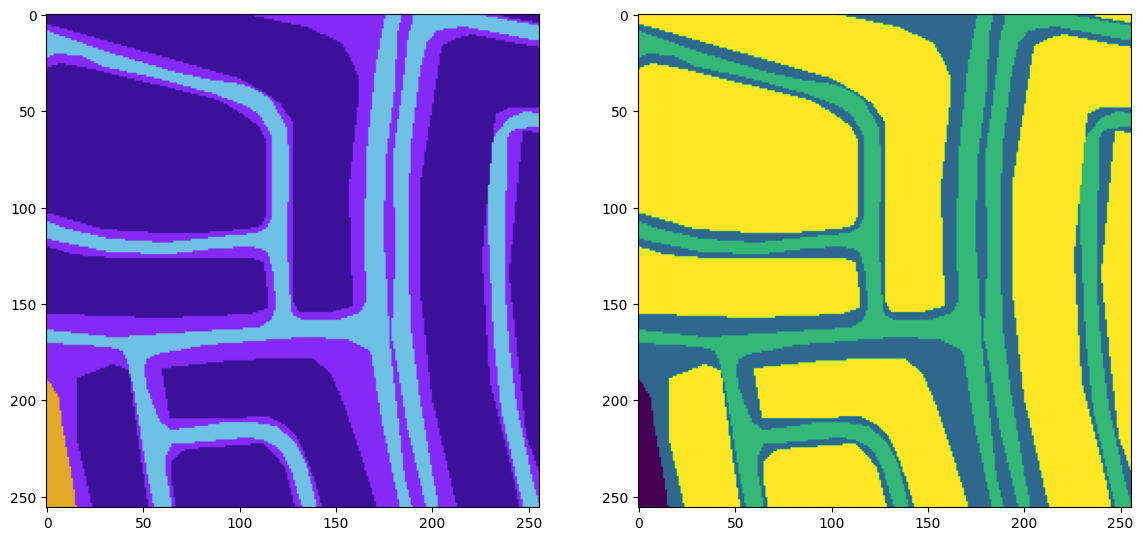

In [63]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
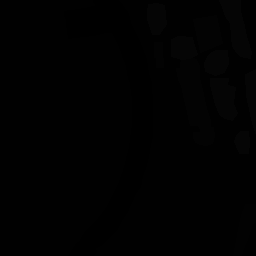

In [64]:
labels[0][:,:,0]

In [65]:
total_classes = len(np.unique(labels))

In [66]:
total_classes

6

In [67]:
from tensorflow.keras.utils import to_categorical

In [68]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [69]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [72]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [71]:
master_trianing_dataset = image_dataset

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [77]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [78]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


**Code Part Two**

In [79]:
#!pip install -U -q segmentation-models

In [80]:
!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.8 MB/s eta 0:00:00


In [81]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
#!pip install -q tensorflow==2.17.0

#!pip install -q keras==3.2.0


In [82]:
import os

os.environ["SM_FRAMEWORK"] = "tf.keras"

In [83]:
from keras import backend as K

In [84]:
import tensorflow as tf

def jaccard_coef(y_true, y_pred):
    y_true_flatten = tf.reshape(y_true, [-1]) #flatten>reshape
    y_pred_flatten = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_flatten * y_pred_flatten)
    final_coef_value = (intersection + 1.0) / (tf.reduce_sum(y_true_flatten) + tf.reduce_sum(y_pred_flatten) - intersection + 1.0)
    return final_coef_value

In [85]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [86]:
metrics = ["accuracy", jaccard_coef]

In [87]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [88]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [89]:
model = get_deep_learning_model()

In [ ]:
# Please uncomment this line to get model confiuration
# model.get_config()

**Loss Function**

- dice loss > focal loss > total loss
- total loss = (dice loss+(1*focal loss))

In [90]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [91]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [92]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [93]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [94]:
total_loss = dice_loss + (1 * focal_loss)

**model compilation**

In [95]:
import tensorflow as tf

In [96]:
from tensorflow.keras import backend as K

In [97]:
tf.keras.backend.clear_session()

In [98]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [99]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 16)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 32)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 128)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 128)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=50,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 65s 686ms/step - accuracy: 0.6076 - jaccard_coef: 0.4566 - loss: 1.2186 - val_accuracy: 0.6989 - val_jaccard_coef: 0.5458 - val_loss: 1.1584
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 144ms/step - accuracy: 0.7324 - jaccard_coef: 0.5811 - loss: 1.1341 - val_accuracy: 0.6992 - val_jaccard_coef: 0.5462 - val_loss: 1.1581
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.7327 - jaccard_coef: 0.5814 - loss: 1.1338 - val_accuracy: 0.6995 - val_jaccard_coef: 0.5465 - val_loss: 1.1579
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.7541 - jaccard_coef: 0.6085 - loss: 1.1105 - val_accuracy: 0.7763 - val_jaccard_coef: 0.6451 - val_loss: 1.0775
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.8197 - jaccard_coef: 0.6971 - loss: 1.0465 - val_accuracy: 0.7775 - val_jaccard_coef: 0.6466 - val_loss: 1.0765
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - accuracy: 0.8207 - jaccard_coef: 0.6985 - loss: 1.045

In [101]:
history_a = model_history

In [102]:
history_a.history

{'accuracy': [0.6841566562652588,
  0.7262787818908691,
  0.7265728116035461,
  0.7744465470314026,
  0.809741199016571,
  0.8106508255004883,
  0.813392698764801,
  0.8148643970489502,
  0.8149693012237549,
  0.8153843879699707,
  0.8155324459075928,
  0.8154330253601074,
  0.8150709867477417,
  0.8150553703308105,
  0.8156219124794006,
  0.8158367276191711,
  0.8154924511909485,
  0.8152502179145813,
  0.8153794407844543,
  0.8149281740188599,
  0.8123419284820557,
  0.8936986327171326,
  0.9052682518959045,
  0.9075212478637695,
  0.908760130405426,
  0.9095229506492615,
  0.9102004766464233,
  0.9105686545372009,
  0.9108472466468811,
  0.9109676480293274,
  0.9111875891685486,
  0.9113537073135376,
  0.9114705324172974,
  0.9115650057792664,
  0.9116722941398621,
  0.9116749167442322,
  0.9117835760116577,
  0.9118931293487549,
  0.9119638800621033,
  0.9120016098022461,
  0.9120627045631409,
  0.9121413230895996,
  0.9122170209884644,
  0.9114795923233032,
  0.9120851159095764,
 

In [103]:
history_a.history

{'accuracy': [0.6841566562652588,
  0.7262787818908691,
  0.7265728116035461,
  0.7744465470314026,
  0.809741199016571,
  0.8106508255004883,
  0.813392698764801,
  0.8148643970489502,
  0.8149693012237549,
  0.8153843879699707,
  0.8155324459075928,
  0.8154330253601074,
  0.8150709867477417,
  0.8150553703308105,
  0.8156219124794006,
  0.8158367276191711,
  0.8154924511909485,
  0.8152502179145813,
  0.8153794407844543,
  0.8149281740188599,
  0.8123419284820557,
  0.8936986327171326,
  0.9052682518959045,
  0.9075212478637695,
  0.908760130405426,
  0.9095229506492615,
  0.9102004766464233,
  0.9105686545372009,
  0.9108472466468811,
  0.9109676480293274,
  0.9111875891685486,
  0.9113537073135376,
  0.9114705324172974,
  0.9115650057792664,
  0.9116722941398621,
  0.9116749167442322,
  0.9117835760116577,
  0.9118931293487549,
  0.9119638800621033,
  0.9120016098022461,
  0.9120627045631409,
  0.9121413230895996,
  0.9122170209884644,
  0.9114795923233032,
  0.9120851159095764,
 

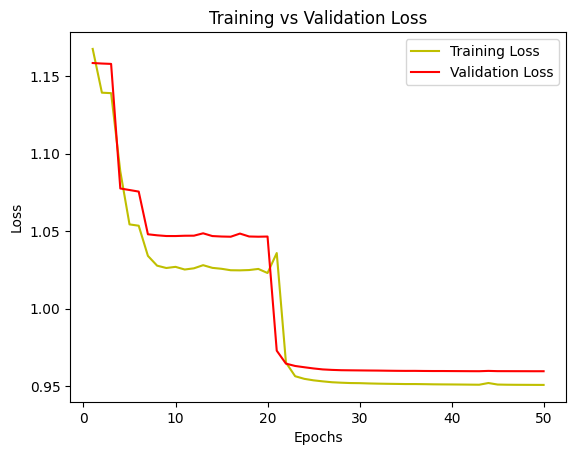

In [104]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss,'r', label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [105]:
val_loss

[1.1584360599517822,
 1.1581100225448608,
 1.1578712463378906,
 1.077528715133667,
 1.0765361785888672,
 1.075516700744629,
 1.0479832887649536,
 1.047322154045105,
 1.046861171722412,
 1.046844482421875,
 1.0470435619354248,
 1.047079086303711,
 1.0486098527908325,
 1.046838402748108,
 1.046538233757019,
 1.0464037656784058,
 1.0484373569488525,
 1.0465558767318726,
 1.04641592502594,
 1.0465232133865356,
 0.9729107022285461,
 0.96455317735672,
 0.9630452394485474,
 0.9622207283973694,
 0.9614458680152893,
 0.9608225226402283,
 0.9605145454406738,
 0.9603111147880554,
 0.9602383971214294,
 0.9601781964302063,
 0.9601154327392578,
 0.9600664377212524,
 0.9599867463111877,
 0.9599190354347229,
 0.9598776698112488,
 0.9598890542984009,
 0.9598225355148315,
 0.9597865343093872,
 0.9597865343093872,
 0.9597532153129578,
 0.9597182869911194,
 0.959682822227478,
 0.9596623182296753,
 0.959867000579834,
 0.9597090482711792,
 0.9596973657608032,
 0.9596802592277527,
 0.9596701860427856,
 0.959

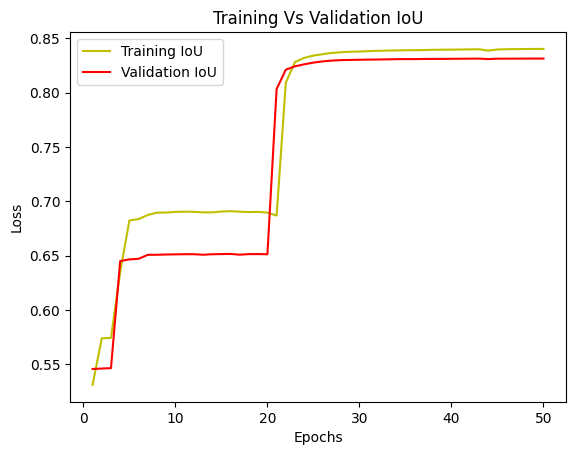

In [106]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [107]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 51}

In [108]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step


In [109]:
len(y_pred)

142

In [110]:
y_pred

array([[[[6.1385623e-29, 7.5672448e-02, 1.1767481e-05, 9.2431581e-01,
          1.0177946e-31, 3.1994091e-32],
         [0.0000000e+00, 2.8340631e-27, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 4.7297347e-34, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 8.2994932e-25,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.3340350e-31,
          0.0000000e+00, 0.0000000e+00],
         [1.9907855e-39, 1.0000000e+00, 4.9952809e-38, 7.8279912e-13,
          0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 1.2051949e-16, 2.3735518e-30, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 3.5691072e-42, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
          0.0000000e+00, 0

In [111]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [112]:
len(y_pred_argmax)

142

In [113]:
y_pred_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [114]:
y_test_argmax = np.argmax(y_test, axis=3)

In [115]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

**comparing prediction results**
 - using test images using mask images and predicted result images

In [116]:
import random

In [117]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


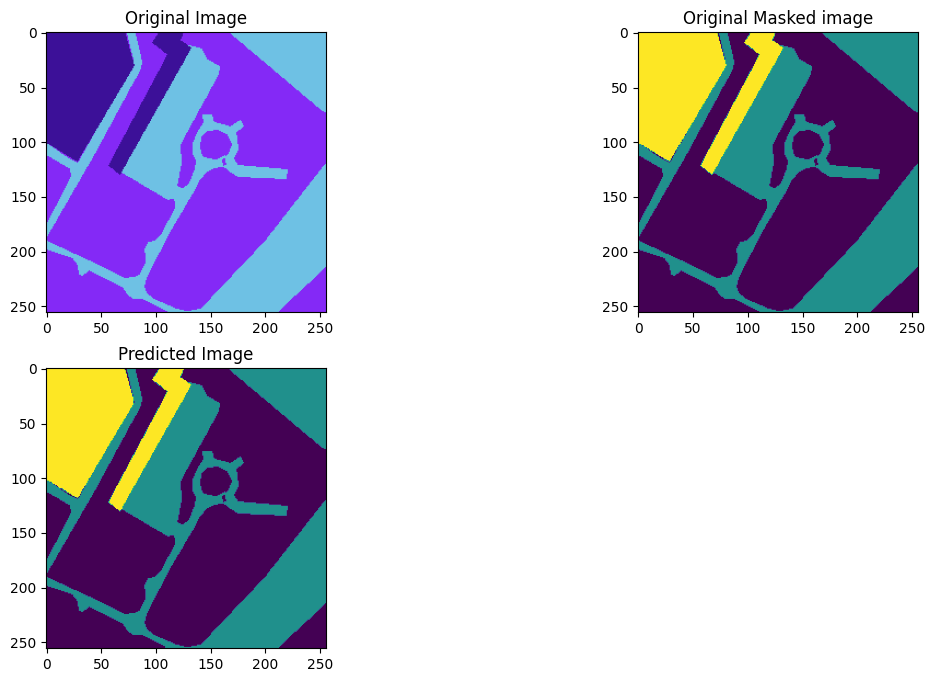

In [123]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(222)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(223)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [124]:
model.save("satellite_segmentation_full.h5")